# Types of Twitter networks

Which one of these are not a type of Twitter network which can be constructed from the Twitter Streaming API?

### Possible Answers


    Reply network
    
    
    Favorite network {Answer}
    
    
    Retweet network
    
    
    Quoted tweet network

# Which direction is the arrow?

![Sam Tyner Retweet](images/sam-tyner-rt.png)

Which direction does the edge go in this retweet? To be clear, @DataCamp retweets @sctyner.

### Possible Answers


    @DataCamp -> @sctyner {Answer}
    
    
    @sctyner -> @DataCamp
    
    
    This is not a directed network.

In [1]:
import pandas as pd

sotu_retweets = pd.read_csv('datasets/sotu2018-rt.csv')
sotu_retweets.head(1)

,contributors,coordinates,created_at,extended_entities,favorite_count,favorited,filter_level,geo,id,id_str,...,retweeted,retweeted_status-extended_tweet-full_text,retweeted_status-text,retweeted_status-user-screen_name,source,text,timestamp_ms,truncated,user-screen_name,withheld_in_countries
0,NaN,NaN,Wed Jan 31 03:51:59 +0000 2018,NaN,0,False,low,NaN,958548390052179968,958548390052179968,...,False,A PERFECT ANALOGY:\n\nSeveral democrats are br...,A PERFECT ANALOGY:\n\nSeveral democrats are br...,ScottPresler,"<a href=""http://twitter.com/download/iphone"" r...",RT @ScottPresler: A PERFECT ANALOGY:\n\nSevera...,1517370719813,False,MatthewJAld,NaN


In [2]:
# exercise 01

"""
Creating retweet network

Social media is, by nature, networked data. Twitter networks manifest in multiple ways. One of the most important types of networks that appear in Twitter are retweet networks. We can represent these as directed graphs, with the retweeting user as the source and the retweeted person as the target. With Twitter data in our flattened DataFrame, we can import these into networkx and create a retweet network.

For this exercise and the rest of this course we'll be using a dataset based on the 2018 State of the Union speech given by Donald Trump. Those tweets have been loaded for you in sotu_retweets.
"""

# Instructions

"""

    Import networkx as nx.

    Use the user's screen name as the source argument.

    Use the retweeted user's screen name as the target argument.

    Ensure that the network is a directed graph in the create_using argument.

"""

# solution

# Import networkx
import networkx as nx

# Create retweet network from edgelist
G_rt = nx.from_pandas_edgelist(
    sotu_retweets,
    source = 'user-screen_name',
    target = 'retweeted_status-user-screen_name',
    create_using = nx.DiGraph())
 
# Print the number of nodes
print('Nodes in RT network:', len(G_rt.nodes()))

# Print the number of edges
print('Edges in RT network:', len(G_rt.edges()))

#----------------------------------#

# Conclusion

"""
Good job! You've created a network.
"""

Nodes in RT network: 2287
Edges in RT network: 2340


"\nGood job! You've created a network.\n"

In [3]:
sotu_replies = pd.read_csv('datasets/sotu2018-reply.csv')
sotu_replies.head(1)

,contributors,coordinates,created_at,display_text_range,extended_entities,extended_tweet,extended_tweet-full_text,favorite_count,favorited,filter_level,...,quoted_status_id,quoted_status_id_str,reply_count,retweet_count,retweeted,source,text,timestamp_ms,truncated,user-screen_name
0,NaN,NaN,Wed Jan 31 00:21:22 +0000 2018,"[34, 140]",NaN,{'full_text': '@LouDobbs @realDonaldTrump @POT...,@LouDobbs @realDonaldTrump @POTUS Discourage i...,0,False,low,...,9.577015e+17,9.577015e+17,0,0,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",@LouDobbs @realDonaldTrump @POTUS Discourage i...,1517358082783,True,ProfessorRobo


In [4]:
# exercise 02

"""
Creating reply network

Reply networks have a markedly different structure to retweet networks. While retweet networks often signal agreement, replies can signal discussion, deliberation, and disagreement. The network properties are the same, however: the network is directed, the source is the replier and the target is the user who is being replied to.

For this exercise we are going to create a reply network from a slightly different sample of State of the Union tweets. Those tweets have been loaded for you in sotu_replies.
"""

# Instructions

"""

    Create the reply network from a pandas edge list.

    Use the user's screen name as the source argument.

    Use the screen name being replied to as the target argument.

    Ensure that the network is a directed graph in the create_using argument.

"""

# solution

# Import networkx
import networkx as nx

# Create reply network from edgelist
G_reply = nx.from_pandas_edgelist(
    sotu_replies,
    source = 'user-screen_name',
    target = 'in_reply_to_screen_name',
    create_using = nx.DiGraph())
    
# Print the number of nodes
print('Nodes in reply network:', len(G_reply.nodes()))

# Print the number of edges
print('Edges in reply network:', len(G_reply.edges()))

#----------------------------------#

# Conclusion

"""

"""

Nodes in reply network: 2622
Edges in reply network: 1904


'\n\n'

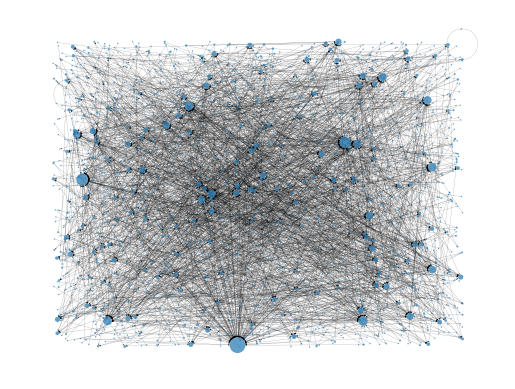

'\n\n'

In [6]:
# exercise 03

"""
Visualizing retweet network

Visualizing retweets networks is an important exploratory data analysis step because it allows us to visually inspect the structure of the network, understand if there is any user that has disproportionate influence, and if there are different spheres of conversation.

A retweet network visualized with a force directed algorithm may look something like this.

Retweet network visualization

We are going to use a layout which runs quicker to see the plot, but the syntax is nearly the same.

networkx has been imported as nx, and the network has been loaded in G_rt for you.
"""

# Instructions

"""

    Generate sizes with a list comprehension. Obtain the second item in x for all elements returned by the .degree() method.

    Pass the network name as the first argument to nx.draw_networkx().

    Pass the layout positions as the second argument to draw_networkx.

    Pass the sizes list to node_size.

"""

# solution
import matplotlib.pyplot as plt
# Create random layout positions
pos = nx.random_layout(G_rt)

# Create size list
sizes = [x[1] for x in G_rt.degree()]

# Draw the network
nx.draw_networkx(G_rt, pos=pos, 
    with_labels = False, 
    node_size = sizes,
    width = 0.1, alpha = 0.7,
    arrowsize = 2, linewidths = 0)

# Turn axis off and show
plt.axis('off'); plt.show()

#----------------------------------#

# Conclusion

"""

"""

In [7]:
column_names = ['screen_name', 'degree_centrality']

In [8]:
# exercise 04

"""
In-degree centrality

Centrality is a measure of importance of a node to a network. There are many different types of centrality and each of them has slightly different meaning in Twitter networks. We are first focusing on degree centrality, since its calculation is straightforward and has an intuitive explanation.

For directed networks like Twitter, we need to be careful to distinguish between in-degree and out-degree centrality, especially in retweet networks. In-degree centrality for retweet networks signals users who are getting many retweets.

networkx has been imported as nx. Also, the networks G_rt and G_reply and column_names = ['screen_name', 'degree_centrality'] have been loaded for you.
"""

# Instructions

"""

    Calculate in-degree centrality for the retweet network with nx.in_degree_centrality() and store it in rt_centrality.

    Do the same for the reply network and store it in reply_centrality.

    Pass the items (i.e. the key-value tuples) of the reply centralities to the DataFrame constructor.

    Do the same for the reply network.

"""

# solution

# Generate in-degree centrality for retweets 
rt_centrality = nx.in_degree_centrality(G_rt)

# Generate in-degree centrality for replies 
reply_centrality = nx.in_degree_centrality(G_reply)

# Store centralities in DataFrame
rt = pd.DataFrame(list(rt_centrality.items()), columns = column_names)
reply = pd.DataFrame(list(reply_centrality.items()), columns = column_names)

# Print first five results in descending order of centrality
print(rt.sort_values('degree_centrality', ascending = False).head())

# Print first five results in descending order of centrality
print(reply.sort_values('degree_centrality', ascending = False).head())

#----------------------------------#

# Conclusion

"""

"""

      screen_name  degree_centrality
84        FoxNews           0.055993
38     WhiteHouse           0.031059
1    ScottPresler           0.029746
7      TomiLahren           0.019685
175      HouseGOP           0.017060
         screen_name  degree_centrality
51   realDonaldTrump           0.057230
53             POTUS           0.019458
22           FoxNews           0.013735
6         WhiteHouse           0.011064
416           FLOTUS           0.010301


'\n\n'

In [11]:
# exercise 05

"""
Betweenness centrality

Betweenness centrality for retweet and reply networks signals users who bridge between different Twitter communities. These communities may be tied together by topic or ideology.

networkx has been imported as nx. The networks G_rt and G_reply, and column_names = ['screen_name', 'betweenness_centrality'] have been loaded for you.
"""

# Instructions

"""
    Calculate betweenness centrality for the retweet network using nx.betweenness_centrality().
   
    Do the same for the reply network.
   
    Create a DataFrame out of retweet centralities.
   
    Do the same for the reply network.
"""

# solution

# Generate betweenness centrality for retweets 
rt_centrality = nx.betweenness_centrality(G_rt)

# Generate betweenness centrality for replies 
reply_centrality = nx.betweenness_centrality(G_reply)

# Store centralities in data frames
rt = pd.DataFrame(list(rt_centrality.items()), columns = column_names)
reply = pd.DataFrame(list(reply_centrality.items()), columns = column_names)

# Print first five results in descending order of centrality
print(rt.sort_values('degree_centrality', ascending = False).head())

# Print first five results in descending order of centrality
print(reply.sort_values('degree_centrality', ascending = False).head())

#----------------------------------#

# Conclusion

"""

"""

        screen_name  degree_centrality
84          FoxNews           0.000026
29   Public_Citizen           0.000009
206     ChristiChat           0.000005
119      guypbenson           0.000005
362    johncardillo           0.000004
          screen_name  degree_centrality
288      ScottPresler       1.019365e-06
319   HRCNJVolunteers       2.912471e-07
1109             RRN3       2.912471e-07
1697    thebestcloser       2.912471e-07
1844   BrandonTXNeely       1.456236e-07


'\n\n'

In [13]:
# exercise 06

"""
Ratios

While not strictly a measure of importance to a network, the idea of being "ratio'd" is a network measure which is particular to Twitter and is typically used to judge the unpopularity of a tweet. "The Ratio," as it is called, is calculated by taking the number of replies and dividing it by the number of retweets. For our purposes, it makes conceptual sense to take only the in-degrees of both the retweet and reply networks.

The networks G_rt and G_reply, and column_names = ['screen_name', 'degree'] have been loaded for you.
"""

# Instructions

"""

    Calculate the in-degree for the retweet network with the graph method .in_degree().

    Do the same for the reply network.

    Merge the two DataFrames together using .merge().

    Calculate the ratio. The column names are degree_reply and degree_rt.

"""

# solution

# Calculate in-degrees and store in DataFrame
degree_rt = pd.DataFrame(list(G_rt.in_degree()), columns = column_names)
degree_reply = pd.DataFrame(list(G_reply.in_degree()), columns = column_names)

# Merge the two DataFrames on screen name
ratio = degree_rt.merge(degree_reply, on = 'screen_name', suffixes = ('_rt', '_reply'))

# Calculate the ratio
ratio['ratio'] = ratio['degree_centrality_reply'] / ratio['degree_centrality_rt']

# Exclude any tweets with less than 5 retweets
ratio = ratio[ratio['degree_centrality_rt'] >= 5]

# Print out first five with highest ratio
print(ratio.sort_values('ratio', ascending = False).head())

#----------------------------------#

# Conclusion

"""

"""

       screen_name  degree_centrality_rt  degree_centrality_reply  ratio
46     SpeakerRyan                     8                       15  1.875
53         NBCNews                    20                       18  0.900
43      benshapiro                     5                        4  0.800
42       SenateGOP                     5                        3  0.600
85  CBSThisMorning                     6                        3  0.500


'\n\n'